# A Brayton cycle analysis

The Brayton cycle is sometimes better known as a jet engine, but it is also at the heart of the most efficient power plants in the world. When air is the working fluid, we don't need heat exchangers; we can burn the fuel right in the working fluid. <br><br>
The Brayton cycle uses three processes to separate four states: <br><br>
(1) ambient air is compressed to some elevated pressure, <br>
(2) fuel is burned at constant pressure to heat the working fluid, and <br>
(3) work is extracted by a turbine. <br>
Here's an example where we compute the mass flow required to produce a 100kW turbine using a 12:1 pressure ratio.

# Brayton cycle demo

**C.R. Martin** (c) 2016-2018 <br>
GPL v3.0 <br>
Enjoy!

In [1]:
import pyromat as pyro
import numpy as np
import matplotlib.pyplot as plt

In [2]:
air = pyro.get('ig.air')

Force the unit system into kJ, kg, bar, K

In [3]:
pyro.config['unit_energy'] = 'kJ'
pyro.config['unit_matter'] = 'kg'
pyro.config['unit_pressure'] = 'bar'
pyro.config['unit_temperature'] = 'K'

Let's design a gas turbine with a 100kW power output

In [4]:
Wnet = 100.

## |Compressor| --> |Combustor| --> |Turbine|

There are three processes separating four states in a brayton cycle. <br><br>
**(1) ---|Compressor|---> (2) ---|Combustor|---> (3) ---|Turbine|---> (4)**

### State 1

The inlet is ambient temperature and pressure. In our example, we will use 1.013bar and 300K for p1 and T1.

In [5]:
p1 = 1.013
T1 = 300.

### Compressor

**|Compressor|** is ideally an isentropic process designed to compress the incoming air to a certain pressure ratio, pr.  Let's use pr=12.

In [6]:
pr = 12.

### State 2

Nothing about the compressor outlet is explicitly prescribed by design. We'll have to calculate our way here.

In [7]:
s1 = air.s(T1,p1)   # what was the entropy at (1)?
p2 = p1*pr
T2 = air.T_s(s=s1,p=p2)    # find T2 for s=s1 and p=p1*pr

How much work did that require?

In [8]:
wc = air.h(T2,p2) - air.h(T1,p1)

### Combustor

**|Combustor|** is where we add heat. We have to be careful not to damage the engine by adding too much heat.  We are limited by a maximum T3. For argument's sake, let's use 1700K.  That's pretty darn hot.

In [9]:
T3 = 1700.
p3 = p2

How much heat did that take?

In [10]:
qh = air.h(T3,p3) - air.h(T2,p2)

### Turbine

**|Turbine|** is where we finally get our useful work. Some of it will have to go to the compressor to keep things going.  The rest of it, we keep. The turbine outlet (4) is ambient pressure again, but its temperature will be based on the turbine performance.

In [11]:
s3 = air.s(T3,p3)
s4 = s3 # Isentropic expansion to p1
p4 = p1
T4 = air.T_s(s=s4,p=p4)

How much work did we get?

In [12]:
wt = air.h(T3,p3) - air.h(T4,p4)

How much is left after we keep the compressor running?

In [13]:
wnet = wt - wc

How much mass flow do we need to hit our target power output?

In [14]:
mdot = Wnet / wnet

What is our efficiency?

In [15]:
n = wnet / qh

## Diagrams

Generate some process diagrams

In [16]:
plt.close('all')
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### isentropic compression is a vertical line

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


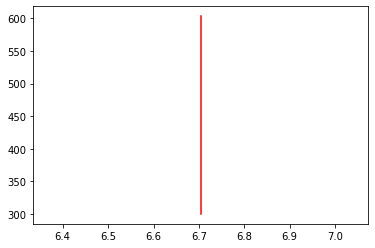

In [17]:
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)

### constant pressure heat addition

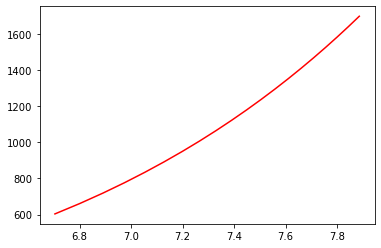

In [18]:
T = np.linspace(T2,T3,20,dtype=object)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)

### isentropic expansion

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


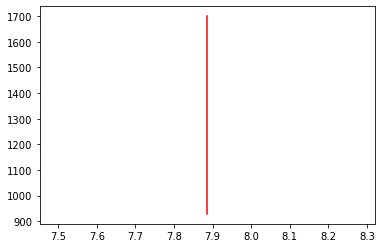

In [19]:
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)

### The pseudo heat rejection process 

In [20]:
T = np.linspace(T1,T4,20)

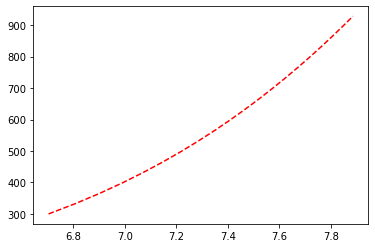

In [21]:
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)

### broaden the axes ranges

(200.0, 2000.0)

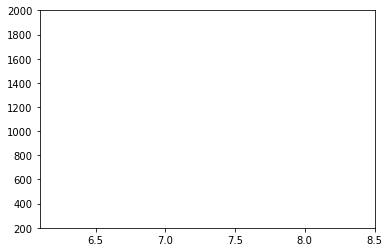

In [22]:
ax = plt.gca()
ax.set_xlim([6.1,8.5])
ax.set_ylim([200,2000])

### add labels and turn on the grid

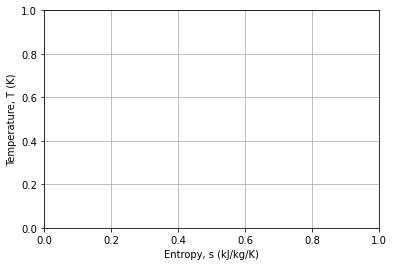

In [23]:
plt.xlabel('Entropy, s (kJ/kg/K)')
plt.ylabel('Temperature, T (K)')
plt.grid('on')

### Add state labels

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Text([7.98584986], [928.265504], '(4)\nT=928.3\np=1.013')

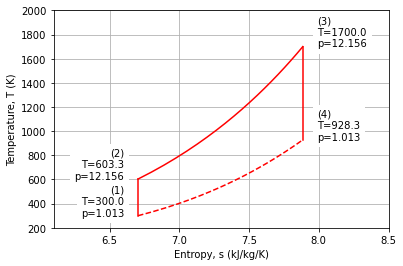

In [24]:
plt.close('all')
plt.figure(1)
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
T = np.linspace(T2,T3,20,dtype=object)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)
T = np.linspace(T1,T4,20)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
ax = plt.gca()
ax.set_xlim([6.1,8.5])
ax.set_ylim([200,2000])
plt.xlabel('Entropy, s (kJ/kg/K)')
plt.ylabel('Temperature, T (K)')
plt.grid('on')
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.3f}'.format(float(T1),float(p1)),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2,'(2)\nT={:.1f}\np={:.3f}'.format(float(T2),float(p2)),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.3f}'.format(float(T3),float(p3)),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4,'(4)\nT={:.1f}\np={:.3f}'.format(float(T4),float(p4)),
    ha='left',backgroundcolor='white')

### Add a summary

In [25]:
plt.text(6.5,1200,
"""$\dot{{m}}$ = {:.3f}kg/s
$p_r$={:.1f}
$\eta$={:.3f}
$\dot{{W}}_{{net}}$={:1}kW""".format(float(mdot),float(pr),float(n),float(Wnet)),
    backgroundcolor='white')
plt.title('Brayton Cycle T-s Diagram')

plt.show()
#plt.show(block=False)

ValueError: Image size of 2289x261022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>